<a href="https://www.kaggle.com/code/lucasrathgeb/digit-recognizer-neural-network-with-numpy?scriptVersionId=146825245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# MNIST Dataset Neural Network with NumPy
In this notebook, I have created a neural network using mainly numpy in an attempt to practice and understand the basics of neural networks. Namely the theory behind the forward propogation and back propagation algorithms.

The neural network was trained on the MNIST Digit Recognizer dataset on Kaggle with 42,000 samples available for training and validation. The final model is tested on an additional 28,000 test samples and submitted to the competition. After testing and tweaking of settings the best score I was able to achieve was about <b>0.978</b> with more typical scores ranging from 0.96-0.973.
    
This notebook is intended for my own practice but may be used as an instructional example by others. 

This project was inspired by this great notebook: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras by Samson Zhang who also made a neural network from scratch. While trying to learn from his notebook I found some of the math and logic hard to follow so decided to start from scrath to ensure I understood what was going on. Some of the same structure and supplementary functions (e.g. one hot encoding) from his notebook can be found here in mine.

### Basic Network Structure
The neural network has a simple 3 layer structure, all using sigmoid activation functions:
- An input layer of 784 nodes
- A hidden layer of 128 nodes
- An output layer of 10 nodes

An input layer of 784 was chosen because each training sample is a 28x28 pixel image resulting in 784 pixel values.  
An output layer of 10 was chosen because the desired output will be one of the numbers from 0-9

The number of nodes can easily be changed in the settings code block. I experimented with varying number of nodes in the hidden layer and found 128 nodes provided a pretty good balance between performance and training time.

### Additional Concepts to Improve Performance
In addition to the basic neural network itself this notebook will include some additional machine learning concepts and features to hopefully improve the resulting models performance. The extra features I chode to add are:
- Data Augmentation 
    - By adding random noise and rotation to the samples we can expand the training set and feed the model more unique and challenging training data to improve its performance.
- Batch Training 
    - Training in batches decreases training time by breaking up the amount of computation into more manageable chunks.
- Momentum in the Gradient Descent Algorithm. 
    - The addition of the momentum term in the gradient descent algorithm can help to speed up training and help the gradient descent algorithm to overcome plateaus and noisy areas of the error space.

### Algorithm and Equations

To start we'll go over the neural network background and the basic equations for forward and back propagation that will be used.

A general step by step algorithm can be outlined as follows:
1. Define the basic NN structure
2. Prepare the training and validation data sets
3. Augment the training data to get additional samples
4. Train the network
5. Perform forward propagation calculations
6. Calculate the Error
7. Perform back propagation calculations to determine how to change the networks weights
8. Update the weight matrices
9. Repeat 4-8 until all data batches have been used for desired number of epochs
10. Test the model on the validation set
11. Model is ready to be used on the test set

The most complicated parts of this proces in terms of the math involved are the forward propagation and back propagation steps. The equations that were used for these calculations can be found below.

#### Loss Function

Squared Error Loss Function $$E = (t - y_i)^2$$


#### Forward Propagation Equations: 
$$net_i = W_i \cdot X_i + b_i$$
$$y_i = f(net_i)$$

#### Sigmoid Activation Function: 
$$f(x) = \frac{1}{1 + e^{-x}}$$

#### Derivative of the Sigmoid Activation Function: 
$$f'(x) = f(x)(1-f(x))$$

#### Back Propagation Equations:

$$\Delta W_3 = \frac{\partial{E}}{\partial{W_3}} = 
\frac{\partial{E}}{\partial{y_3}} \cdot 
\frac{\partial{y_3}}{\partial{net_3}} \cdot 
\frac{\partial{net_3}}{\partial{W_3}}$$

$$\frac{\partial{E}}{\partial{y_3}} = -2(t-y_3) =2(y_3 - t)$$

$$\frac{\partial{y_3}}{\partial{net_3}} = f'(net_3)$$

$$\frac{\partial{net_3}}{\partial{W_3}} = y_2$$

$$\therefore  \boxed{\Delta W_3 = 2(y_3 - t)f'(net_3)y_2}$$

$$\Delta W_2 = \frac{\partial{E}}{\partial{W_2}} = 
\frac{\partial{E}}{\partial{y_3}} \cdot 
\frac{\partial{y_3}}{\partial{net_3}} \cdot 
\frac{\partial{net_3}}{\partial{y_2}} \cdot
\frac{\partial{y_2}}{\partial{net_2}} \cdot
\frac{\partial{net_2}}{\partial{W_2}}$$

$$\frac{\partial{net_3}}{\partial{y_2}} = W_3$$

$$\frac{\partial{y_2}}{\partial{net_2}} = f'(net_2)$$

$$\frac{\partial{net_2}}{\partial{W_2}} = y1 $$

$$\therefore  \boxed{\Delta W_2 = 2(y_3 - t)f'(net_3)W_3f'(net_2)y1}$$

$$\Delta W_1 = \frac{\partial{E}}{\partial{W_1}} = 
\frac{\partial{E}}{\partial{y_3}} \cdot 
\frac{\partial{y_3}}{\partial{net_3}} \cdot 
\frac{\partial{net_3}}{\partial{y_2}} \cdot
\frac{\partial{y_2}}{\partial{net_2}} \cdot
\frac{\partial{net_2}}{\partial{y_1}} \cdot
\frac{\partial{y_1}}{\partial{net_1}} \cdot
\frac{\partial{net_1}}{\partial{W_1}}$$

$$\frac{\partial{net_2}}{\partial{y_1}} = W_2$$
$$\frac{\partial{y_1}}{\partial{net_1}} = f'(net_1)$$
$$\frac{\partial{net_1}}{\partial{W_1}} = X$$

$$\therefore  \boxed{\Delta W_1 = 2(y_3 - t)f'(net_3)W_3f'(net_2)W_2f'(net_1)X}$$

And finally to update the weight matrices we have:

$$W_i = W_i - \eta \Delta W_i$$

However, to update the weights including momentum we must also include the momentum term which is the weight change $\Delta W_i$  from the previous iteration of the algorithm or $\Delta W_{i, previous}$ multiplied by the momentum coefficient $\alpha$ which represents the portion of the previous weight change to include in the current update i.e. $0.0 \leq \alpha \leq 1.0$  
  
  $$W_i = W_i - \eta (\Delta W_i + \alpha \Delta W_{i, previous})$$

where:
- $t$ is the target or desired output vector  
- $y_i$ is the output of layer $i$ after activation  
- $net_i$ is the output of layer $i$ before activation  
- $X$ is the input vector  
- $W_i$ is the weight matrix for layer $i$  
- $b_i$ is the bias vector for layer $i$  
- $f(x)$ is the activation function (sigmoid in this case)  
- $f'(x)$ is the derivative of the activation function  
- $\Delta W_i$ is the partial derivative of the loss function with respect to $W_i$  
- $\eta$ is the learning rate, typically ~0.01  
- $\alpha$ is the momentum coefficient, typically ~0.9
  




### Environment Setup and Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # Used for linear algebra
import pandas as pd # Used for data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Used for plots
from scipy import ndimage # Used to apply rotations to training samples
import time # Used for measuring the training time.
import IPython # Used for playing an audio file once training is complete.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import sys

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-ready-mp3/model_ready.mp3
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### Settings

In [2]:
#Set NumPy random seed
np.random.seed(69)

#Training settings
training_set_size = 41600 # Out of 42,000 available samples from train.csv
percent_noise_added = 0.17 # Fraction of random noise to be added to samples during data augmentation
batch_size = 200 # Training set size must be evenly divisible by the batch size for simplicity
epochs = 75 # Number of times the model will see all batches during training
iterations_per_batch = 1 # Number of gradient descent iterations to perform per batch (was experimenting with a hybrid batch training approach)
learning_rate = 0.01
momentum = 0.9 # Portion of previous gradient to be added to the new one.
max_angle = 35 # Maximum angle (+/-) in degrees to apply to rotated training samples during data augmentation 
min_angle = 10 # Minimum angle (+/-) in degrees to apply to rotated training samples during data augmentation 

#Number of nodes in each layer
layer1 = 784
layer2 = 256
layer3 = 10

### Data Set Up and Augmentation
The following functions and code blocks are used during data augmentation to add noise and rotations to samples.

In [3]:
# Adds a given percentage of random noise to the sample
def add_noise(img,p_noise):
    img = img + (np.random.normal(0,1,size=img.shape)*np.random.choice([0,1],size=img.shape,p=[1-p_noise,p_noise]))
    img[img > 1] = 1
    img[img < 0] = 0
    return img

In [4]:
# When applying rotations to the samples some values may fall outside the [0,255] range.
# Adjusting the values to be in this range helps to clean them up after rotation.
def clamp_vals(img):
    img[img > 245] = 255
    img[img < 10] = 0
    return img

In [5]:
# Adds a rotation of min_angle to max_angle (+/-) to the given sample
def add_rotation(img, min_angle, max_angle):

    img = img.reshape((28, 28)) * 255
    
    angle = np.random.randint(min_angle, max_angle)
    angle = angle * np.random.choice([-1,1])
    
    img = ndimage.rotate(img, angle, reshape=False, mode='nearest')
    img = clamp_vals(img)
    img = img.reshape((784)) / 255
        
    return img

In [6]:
# Import and prepare the training data and set aside some for validation.
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

X = np.array(data)
m, n = X.shape
print("Training set shape: ", (m,n))
np.random.shuffle(X)

data_train = X[:training_set_size].T
orig_data = data_train

print("Applying Data Augmentation...")

data_no_aug = data_train.copy()
data_noise = data_train.copy()
data_rot = data_train.copy()
data_noise_rot = data_train.copy()

for i in range(training_set_size):
    data_noise[1:,i] = add_noise(data_noise[1:,i]/255, percent_noise_added)*255
    data_rot[1:,i] = add_rotation(data_rot[1:,i]/255, min_angle, max_angle)*255
    data_noise_rot[1:,i] = add_rotation(data_noise_rot[1:,i]/255, min_angle, max_angle)*255
    data_noise_rot[1:,i] = add_noise(data_noise_rot[1:,i]/255, percent_noise_added)*255

data_train = np.append(data_no_aug, data_noise, axis=1)
data_train = np.append(data_train, data_rot, axis=1)
data_train = np.append(data_train, data_noise_rot, axis=1)

print("Data Augmentation Complete")

np.random.shuffle(data_train.T)
x_train = data_train[1:] / 255
y_train = data_train[0,:].astype(int)

data_dev = X[training_set_size:].T
x_dev = data_dev[1:]
x_dev = x_dev/255
y_dev = data_dev[0,:]

temp,training_set_size = x_train.shape
print("Number of training samples after augmentation: ", training_set_size)

Training set shape:  (42000, 785)
Applying Data Augmentation...
Data Augmentation Complete
Number of training samples after augmentation:  166400


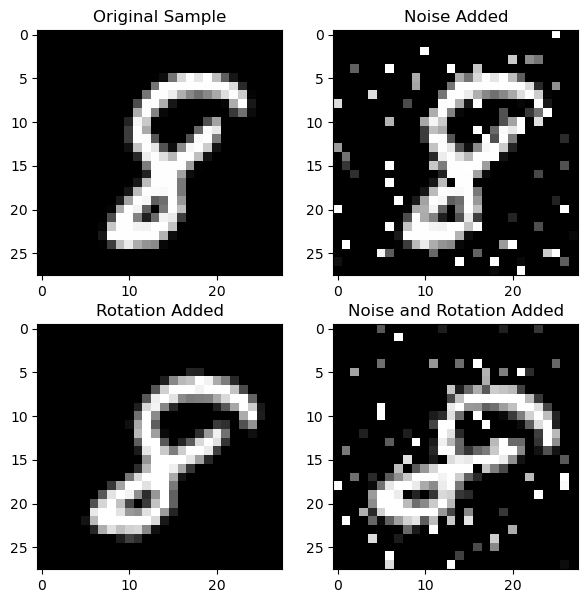

In [7]:
# What does the data augmentation look like?
# Plotting the 4 different sample sets: unaugmented, noise added, rotation added, noise and rotation added
fig = plt.figure(figsize=(7, 7))
fig.tight_layout()
rows = 2
columns = 2
img1 = data_no_aug[1:,0].reshape((28, 28)) * 255
img2 = data_noise[1:,0].reshape((28, 28)) * 255
img3 = data_rot[1:,0].reshape((28, 28)) * 255
img4 = data_noise_rot[1:,0].reshape((28, 28)) * 255

fig.add_subplot(rows, columns, 1)
plt.gray()
plt.imshow(img1)
plt.title("Original Sample")
fig.add_subplot(rows, columns, 2)
plt.gray()
plt.imshow(img2)
plt.title("Noise Added")
fig.add_subplot(rows, columns, 3)
plt.gray()
plt.imshow(img3)
plt.title("Rotation Added")
fig.add_subplot(rows, columns, 4)
plt.gray()
plt.imshow(img4)
plt.title("Noise and Rotation Added")

plt.show()

### Forward/Back Propagation and Supplementary Functions

In [8]:
# Weights and biases are initialized using Xavier initialization
def init_params():
    
    W1 = np.random.randn(layer2,layer1) * np.sqrt(2.0/(layer1))
    W2 = np.random.randn(layer3,layer2) * np.sqrt(2.0/(layer1))
    W3 = np.random.randn(layer3,layer3) * np.sqrt(2.0/(layer1))
    b1 = np.zeros((layer2,1))
    b2 = np.zeros((layer3,1))
    b3 = np.zeros((layer3,1))
    return W1, W2, W3, b1, b2, b3

# Sigmoid activation function
def activation(z):
    return (1 / (1 + np.exp(-z)))

def d_activation(z):
    # The derivative of the sigmoid function f(x) is f'(x) = f(x)(1-f(x))
    # Input the already activated values (nets pumped throgh activation()) to save computation
    return np.multiply(z,(np.ones(z.shape)-z))

# Forward propagation calculations
def forward_prop(W1,W2,W3,b1,b2,b3,x):

    net1 = np.dot(W1,x) + b1
    y1 = activation(net1)
    net2 = np.dot(W2,y1) + b2
    y2 = activation(net2)
    net3 = np.dot(W3,y2) + b3
    y3 = activation(net3)
    return net1, y1, net2, y2, net3, y3

# From the model's output vector get the predicted number
def get_predictions(Z):
    # Since the predictions range from 0-9 the index of the max output value represents the prediction
    return np.argmax(Z,0)

# One hot encode the given label for each sample so that it will be comparable with the format of the model's output
# i.e. a label of 3 becomes a vector: [0,0,0,1,0,0,0,0,0,0] where the index of the vector/array represents the label
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Perform back propagation calculations to determine the change in weights for each layer
def back_prop(W2,W3,net1,y1,net2,y2,net3,y3,Y,X):

    T = one_hot(Y)
    cost2 = 2*(y3-T)
    
    dk = np.multiply(cost2,d_activation(y3))
    dW3 = np.dot(dk,y2.T)
    
    dEdy = np.dot(dk.T, W3.T)
    di = np.multiply(dEdy, d_activation(y2.T))
    dW2 = np.dot(di.T,y1.T)
    
    dEdy2 = np.dot(di,W2)
    di2 = np.multiply(dEdy2,d_activation(y1).T)
    dW1 = np.dot(di2.T,X.T)

    db1 = (np.sum(di2,axis=0).T).reshape(layer2,1)
    db2 = (np.sum(dk,axis=1).T).reshape(layer3,1)
    db3 = (np.sum(di,axis=0).T).reshape(layer3,1)

    return dW1, dW2, dW3, db1, db2, db3

# Calculate the overall accuracy of the output given the model's output and the desired output
def get_accuracy(Z,Y):
    return np.sum(Z==Y)/Y.size

In [9]:
# Update the weights with momentum
def update_weights_with_momentum(W1,dW1,W2,dW2,W3,dW3, learning_rate,b1,b2,b3,db1,db2,db3,dW1_prev,dW2_prev,dW3_prev,momentum):
    
    W1 = W1 - learning_rate*(dW1 + momentum*dW1_prev)
    W2 = W2 - learning_rate*(dW2 + momentum*dW2_prev)
    W3 = W3 - learning_rate*(dW3 + momentum*dW3_prev)
    b1 = b1 - learning_rate*db1   
    b2 = b2 - learning_rate*db2   
    b3 = b3 - learning_rate*db3 
    return W1, W2, W3, b1, b2, b3

In [10]:
# Perform each step of the gradient descent algorithm
def batch_gradient_desc_with_momentum(X,Y,iterations, learning_rate, momentum,W1, W2, W3, b1, b2, b3):
    
    dW2_prev = 0
    dW1_prev = 0
    dW3_prev = 0
    
    for i in range(iterations):
        net1, y1, net2, y2, net3, y3 = forward_prop(W1, W2, W3, b1, b2, b3, X)
        
        if(i>0):
            dW1_prev = dW1
            dW2_prev = dW2
            dW3_prev = dW3
            
        dW1, dW2, dW3, db1, db2, db3 = back_prop(W2,W3,net1,y1,net2,y2,net3,y3,Y,X)
        
        W1, W2, W3, b1, b2, b3 = update_weights_with_momentum(W1,dW1,W2,dW2,W3,dW3, 
                                                              learning_rate,
                                                              b1,b2,b3,db1,db2,db3,
                                                              dW1_prev,dW2_prev,dW3_prev,
                                                              momentum)
        
        if i==iterations-1:
            acc = round(get_accuracy(get_predictions(y3),Y)*100,4)

    return W1, W2, W3, b1, b2, b3, acc

### Training
Now its time to setup and train the model!

In [11]:
W1, W2, W3, b1, b2, b3 = init_params()

start_time = time.time()

for j in range(epochs):
    accuracy = np.zeros(int(training_set_size/batch_size))
    
    for i in range(0,training_set_size,batch_size):
        
        index1 = i
        index2 = i + batch_size - 1
        x_train_batch = x_train[:,index1:index2]
        y_train_batch = y_train[index1:index2]
        
        W1, W2, W3, b1, b2, b3, acc = batch_gradient_desc_with_momentum(x_train_batch,
                                                                        y_train_batch,
                                                                        iterations_per_batch,
                                                                        learning_rate,
                                                                        momentum,
                                                                        W1, W2, W3, 
                                                                        b1, b2, b3)
        
        accuracy[int(i/batch_size)] = acc
    
    min_acc = round(np.min(accuracy),2)
    max_acc = round(np.max(accuracy),2)
    avg_acc = round(np.average(accuracy),2)
    
    print("-----------------------------------------------------------------------------------")
    print("                             EPOCH: ", j+1, "  COMPLETED")
    print("-----------------------------------------------------------------------------------")
    print("EPOCH ACCURACY STATS      Min: ",min_acc , " Max: ",max_acc ," Avg: ", avg_acc)
    
    net1, y1, net2, y2, net3, y3 = forward_prop(W1, W2, W3, b1, b2, b3, x_dev)
    acc = round(get_accuracy(get_predictions(y3),y_dev)*100,2)
    print("\nValidation accuracy: ", acc, "%")
    
end_time = time.time()
train_time = (end_time-start_time)/60

print("\n---------- Training Details ---------- ")
print("Training Time [min]: ",train_time,"   Training Set Size: ", training_set_size, "   Batch Size: ", batch_size)
IPython.display.Audio('/kaggle/input/model-ready-mp3/model_ready.mp3', autoplay=True)

-----------------------------------------------------------------------------------
                             EPOCH:  1   COMPLETED
-----------------------------------------------------------------------------------
EPOCH ACCURACY STATS      Min:  4.02  Max:  61.31  Avg:  24.03

Validation accuracy:  58.0 %
-----------------------------------------------------------------------------------
                             EPOCH:  2   COMPLETED
-----------------------------------------------------------------------------------
EPOCH ACCURACY STATS      Min:  47.24  Max:  90.45  Avg:  68.83

Validation accuracy:  89.75 %
-----------------------------------------------------------------------------------
                             EPOCH:  3   COMPLETED
-----------------------------------------------------------------------------------
EPOCH ACCURACY STATS      Min:  77.39  Max:  95.98  Avg:  87.5

Validation accuracy:  93.25 %
-------------------------------------------------------------

## Validation

With training completed, let's take a look at how the final trained model performs on the validation set.

In [12]:
print("Samples used for validation: ", y_dev.size)

net1, y1, net2, y2, net3, y3 = forward_prop(W1, W2, W3, b1, b2, b3, x_dev)

print(get_predictions(y3))
print(y_dev)
acc = round(get_accuracy(get_predictions(y3),y_dev)*100,2)
print("\nValidation accuracy: ", acc, "%")

Samples used for validation:  400
[8 2 6 0 2 6 2 1 2 8 4 9 4 7 9 1 7 8 4 5 8 2 8 4 1 0 1 8 2 1 7 7 2 6 4 1 9
 5 8 5 2 2 6 1 9 3 6 7 1 5 0 7 2 3 7 7 2 7 0 1 1 3 2 5 5 2 9 1 1 3 9 1 3 9
 8 4 7 7 4 0 4 4 0 1 4 6 0 5 2 4 2 9 7 5 0 6 7 2 3 9 0 0 6 6 4 6 5 8 5 3 9
 9 2 8 5 1 5 0 2 1 3 9 8 7 6 6 7 3 5 7 2 3 3 3 8 9 4 4 5 1 7 1 5 5 1 5 0 7
 3 9 7 7 5 5 7 9 3 0 7 7 1 3 6 2 3 6 6 3 9 9 4 4 0 8 4 0 6 7 2 0 7 2 6 8 3
 2 0 9 6 4 1 6 8 1 3 7 1 0 5 5 5 3 8 9 6 7 5 2 5 9 9 3 1 1 6 3 4 1 7 4 4 6
 8 1 0 3 6 0 1 1 8 1 1 9 2 3 8 0 5 1 4 9 1 1 6 0 3 9 9 2 0 1 9 3 0 6 4 1 9
 8 7 4 6 0 8 4 4 1 1 1 5 7 1 6 2 7 9 7 4 2 5 9 0 4 0 9 4 4 7 9 8 8 5 3 8 8
 6 2 8 1 4 4 1 9 3 9 7 6 8 6 7 8 2 2 4 3 5 2 0 2 0 8 3 4 5 9 6 4 9 1 8 6 3
 2 0 2 9 8 1 2 2 3 2 0 1 2 3 7 6 4 1 0 4 8 6 7 3 4 4 4 7 0 8 8 6 0 9 3 9 3
 9 9 9 3 7 7 2 5 4 4 1 8 9 9 4 1 2 4 7 2 0 8 5 3 0 5 0 0 8 0]
[3 2 6 0 2 6 2 1 2 8 4 9 4 2 9 1 7 8 4 5 8 2 8 4 1 0 1 8 2 1 7 7 2 6 4 1 9
 5 8 5 2 2 6 1 9 3 6 7 1 5 0 7 2 3 7 7 2 7 0 1 1 3 2 5 5 2 9 1 1 3 9 1 3 9
 8 4

Now let's look at some predictions the model got incorrect.

Number of incorrect predictions =  6  /  400


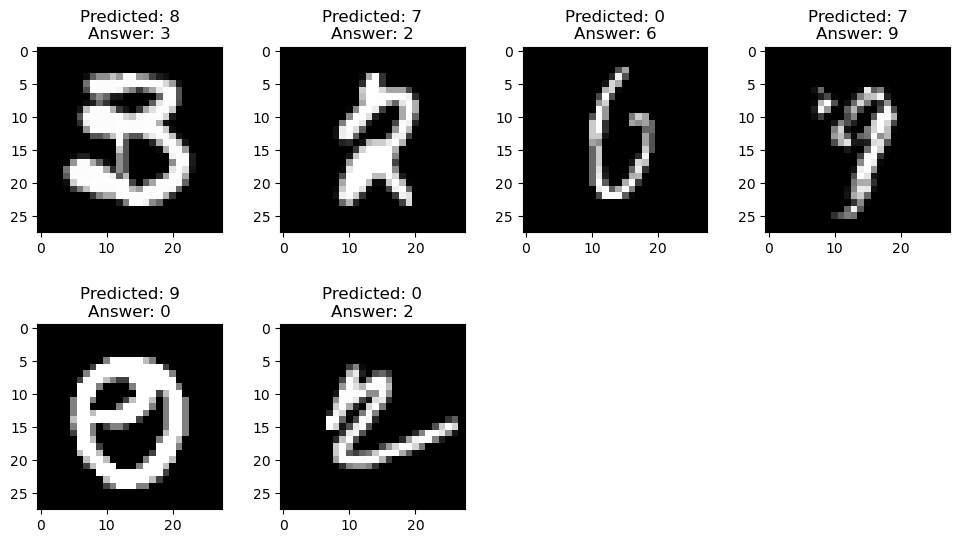

In [13]:

preds = get_predictions(y3)

indices_of_incorrect_preds = np.argwhere(y_dev!=preds).reshape(np.argwhere(y_dev!=preds).size)
print("Number of incorrect predictions = ", indices_of_incorrect_preds.size, " / ", y_dev.size)
fig = plt.figure(figsize=(12, 6))
fig.tight_layout()
rows = 2
columns = 4

for i in range(min(y_dev[indices_of_incorrect_preds].size,8)):
    current_image = x_dev[:, indices_of_incorrect_preds[i]]
    current_image = current_image.reshape((28, 28)) * 255
    fig.add_subplot(rows, columns, i+1)
    plt.gray()
    plt.imshow(current_image)
    title = "Predicted: " + str(preds[indices_of_incorrect_preds[i]]) + "\nAnswer: " + str(y_dev[indices_of_incorrect_preds[i]])
    plt.title(title)
plt.subplots_adjust(hspace=0.5)
plt.show()

Let's look at some predictions the model got correct

Number of correct predictions =  394  /  400


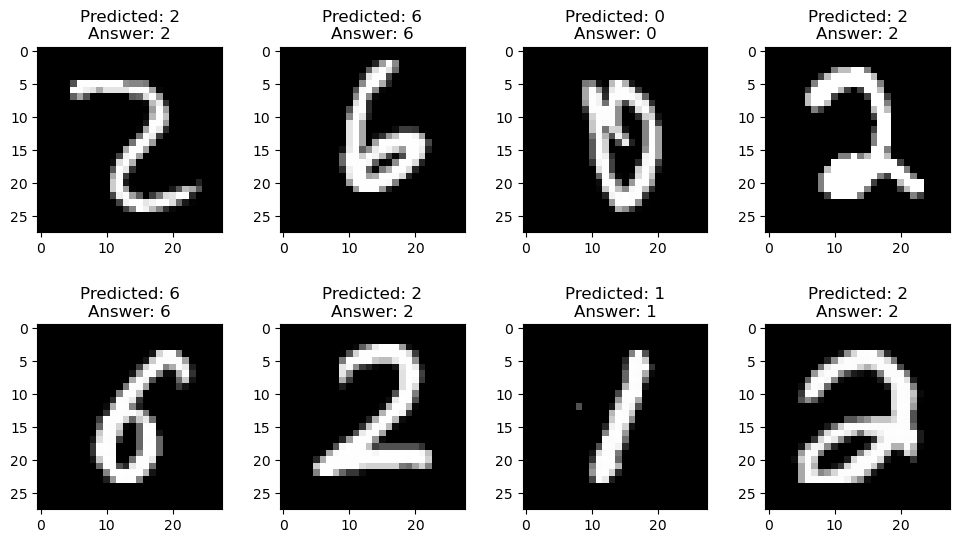

In [14]:
preds = get_predictions(y3)

arg_equal = np.argwhere(y_dev==preds)

indices_of_incorrect_preds = arg_equal.reshape(arg_equal.size)
print("Number of correct predictions = ", indices_of_incorrect_preds.size, " / ", y_dev.size)
fig = plt.figure(figsize=(12, 6))
fig.tight_layout()
rows = 2
columns = 4

for i in range(min(y_dev[indices_of_incorrect_preds].size,8)):
    current_image = x_dev[:, indices_of_incorrect_preds[i]]
    current_image = current_image.reshape((28, 28)) * 255
    fig.add_subplot(rows, columns, i+1)
    plt.gray()
    plt.imshow(current_image)
    title = "Predicted: " + str(preds[indices_of_incorrect_preds[i]]) + "\nAnswer: " + str(y_dev[indices_of_incorrect_preds[i]])
    plt.title(title)
plt.subplots_adjust(hspace=0.5)
plt.show()

## Testing

Now let's evaluate the model on the test set and create the submission.csv file for the Kaggle competition.

In [15]:
# Import and format the test data
data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

X = np.array(data)
print(X.shape)
data_test = X.T
x_test = data_test
x_test = x_test/255

(28000, 784)


In [16]:
# Run the test set through the model and generate the submission.csv file
net1, y1, net2, y2, net3, y3 = forward_prop(W1, W2, W3, b1, b2, b3, x_test)

df = pd.DataFrame(get_predictions(y3))
df.index += 1
df.to_csv("/kaggle/working/submission.csv",index_label="ImageId",header=["Label"])

Thanks for reading! If you found this notebook useful or interesting consider leaving a comment or upvoting!  

Lucas